# Netflix Movies and TV Shows Analysis

**Source**:<br>
__[Netflix Movies and TV Shows](https://www.kaggle.com/shivamb/netflix-shows)__

<div class="alert alert-block alert-info">

<b>About this Dataset</b>: Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

</div>

<div class="alert alert-block alert-info">
 
<b>Column Description:</b>
- show_id: Unique ID for every Movie / Ts Show

- type: Identifier - A Movie or TV Show

- title: Title of the Movie / Tv Show

- director: Director of the Movie

- cast: Actors involved in the Movie / Tv Show

- country: Country where the Movie / Tv Show was produced

- date_added: Date it was added on Netflix

- release_year: Actual Release year of the Movie / Tv Show

- rating: TV Rating of the Movie / Tv Show

- duration: Total Duration - in minutes or number of seasons

- listed_in: Genre

- description: The summary description

</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import missingno

In [2]:
df_n = pd.read_csv('netflix_titles.csv')

In [3]:
df_n.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
show_id         8807 non-null object
type            8807 non-null object
title           8807 non-null object
director        6173 non-null object
cast            7982 non-null object
country         7976 non-null object
date_added      8797 non-null object
release_year    8807 non-null int64
rating          8800 non-null object
duration        8807 non-null object
listed_in       8807 non-null object
description     8807 non-null object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df_n['date_added'] = pd.to_datetime(df_n['date_added'])

In [6]:
df_n.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
df_n[df_n.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [8]:
df_n.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

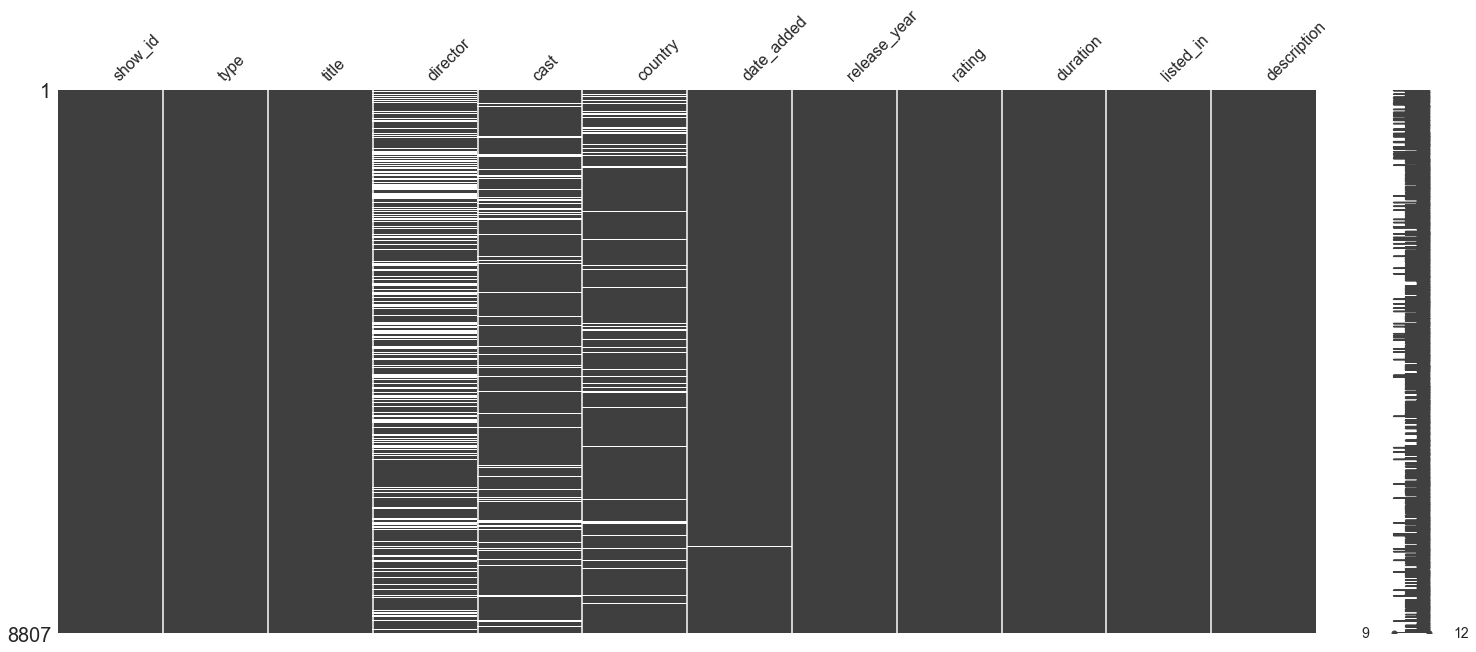

In [9]:
# Visualizing missing values
missingno.matrix(df_n)

<div class="alert alert-block alert-warning">

<b>Issues:</b>
- "director", "cast", "country", "date_added", "rating" columns have missing values 

</div>

**Solution to the missing values:**
- Droping the rows that have missing values in "data_added";
- For "director", "cast", "country", "rating": Replacing the "NaN" with "Unknown"

## Data Cleaning

In [10]:
df_n.dropna(subset=['date_added'], inplace=True)

In [11]:
df_n['director'].fillna('Unknown', inplace=True)
df_n['cast'].fillna('Unknown', inplace=True)
df_n['country'].fillna('Unknown', inplace=True)
df_n['rating'].fillna('Unknown', inplace=True)

In [12]:
df_n.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Base on the Film Rating System, we can conclude that 'NR' and 'UR' have the similar definition: If a film has not been submitted for a rating or is an uncut version of a film that was submitted.
<br>
So I would like to replace 'UR' with 'NR'

In [13]:
for i in df_n.index:
    if df_n.loc[i, 'rating'] == 'UR':
        df_n.loc[i, 'rating'] = 'NR'

In [14]:
# Stroe the cleaned data set into a csv file
df_n.reset_index(drop=True)
df_n.to_csv('Cleaned_Netflix.csv', index=False)

## EDA and Feature Engineering

In [15]:
df = pd.read_csv('Cleaned_Netflix.csv')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8797 entries, 0 to 8796
Data columns (total 12 columns):
show_id         8797 non-null object
type            8797 non-null object
title           8797 non-null object
director        8797 non-null object
cast            8797 non-null object
country         8797 non-null object
date_added      8797 non-null object
release_year    8797 non-null int64
rating          8797 non-null object
duration        8797 non-null object
listed_in       8797 non-null object
description     8797 non-null object
dtypes: int64(1), object(11)
memory usage: 824.8+ KB


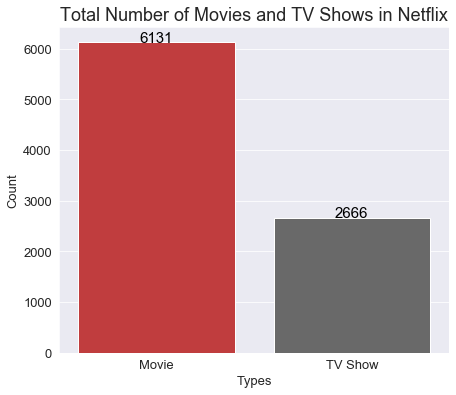

In [17]:
plt.figure(figsize=(7,6))
ax1 = sns.countplot(data = df, x = 'type', palette=['tab:red', 'dimgrey'])

for p in ax1.patches:
    ax1.text(p.get_x()+p.get_width()/2., p.get_height()+0.1, p.get_height(), ha='center', color='black', size=15)

plt.title('Total Number of Movies and TV Shows in Netflix', fontsize=18)
plt.xlabel('Types', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.show()

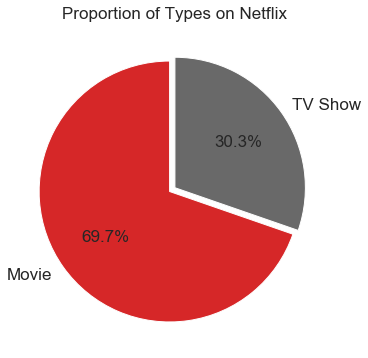

In [18]:
plt.figure(figsize=(7,6))

ax2 = plt.pie(df.type.value_counts(), labels=df.type.unique(), startangle=90, autopct='%1.1f%%', 
              explode=[0.05, 0], colors=['tab:red', 'dimgrey'], textprops={'fontsize':17})

plt.title('Proportion of Types on Netflix', fontsize=17)

plt.show()

In [19]:
df['add_year'] = df.date_added.apply(lambda x: int(str(x)[:4]))

In [20]:
df['add_year-month'] = df.date_added.apply(lambda x: str(x)[:7])

In [21]:
df.groupby('add_year').count()['title']

add_year
2008       2
2009       2
2010       1
2011      13
2012       3
2013      11
2014      24
2015      82
2016     429
2017    1188
2018    1649
2019    2016
2020    1879
2021    1498
Name: title, dtype: int64

In [22]:
df.groupby(['add_year','type']).count()['title']

add_year  type   
2008      Movie         1
          TV Show       1
2009      Movie         2
2010      Movie         1
2011      Movie        13
2012      Movie         3
2013      Movie         6
          TV Show       5
2014      Movie        19
          TV Show       5
2015      Movie        56
          TV Show      26
2016      Movie       253
          TV Show     176
2017      Movie       839
          TV Show     349
2018      Movie      1237
          TV Show     412
2019      Movie      1424
          TV Show     592
2020      Movie      1284
          TV Show     595
2021      Movie       993
          TV Show     505
Name: title, dtype: int64

In [23]:
# Proportion of movies/tv shows being added for each year
print(round(df.groupby(['add_year','type']).count()['title'] / df.groupby('add_year').count()['title'] * 100, 1))

add_year  type   
2008      Movie       50.0
          TV Show     50.0
2009      Movie      100.0
2010      Movie      100.0
2011      Movie      100.0
2012      Movie      100.0
2013      Movie       54.5
          TV Show     45.5
2014      Movie       79.2
          TV Show     20.8
2015      Movie       68.3
          TV Show     31.7
2016      Movie       59.0
          TV Show     41.0
2017      Movie       70.6
          TV Show     29.4
2018      Movie       75.0
          TV Show     25.0
2019      Movie       70.6
          TV Show     29.4
2020      Movie       68.3
          TV Show     31.7
2021      Movie       66.3
          TV Show     33.7
Name: title, dtype: float64


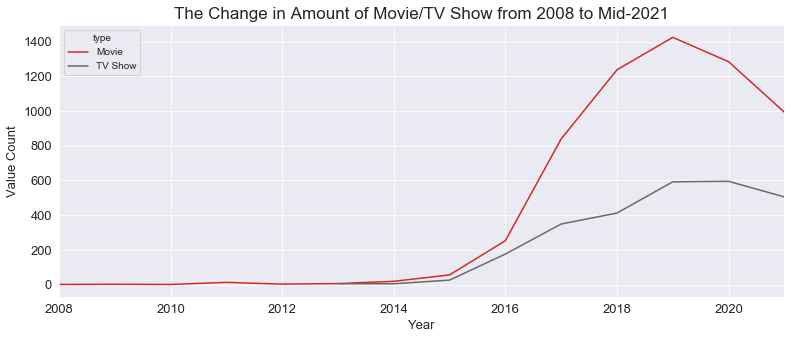

In [24]:
fix, ax = plt.subplots(figsize=(13,5))

ax3 = df.groupby(['add_year','type']).count()['title'].unstack().plot(ax=ax, color=['tab:red', 'dimgrey'], legend=True)

plt.title('The Change in Amount of Movie/TV Show from 2008 to Mid-2021', fontsize=17)
plt.ylabel('Value Count', fontsize=13)
plt.xlabel('Year', fontsize=13)
plt.tick_params(axis='both', labelsize=13)

plt.show()

- In 2008, Netflix add 1 movie and 1 TV Show to the its steaming platform.
- Netflix didn't add any TV Shows between 2009 and 2012.
- Starting at 2016, the amount of movies on Netflix was growing rapidly.
- 2019 is a peak year for Netflix, but this may due to the pandemic outbreak from 2020.
- During the pandemic outbreak, the amount of movies being added fell rapidly, but the amount of TV shows did not have this trend.
- Since the data was only updated to mid-2021, an assumption we may make is that the amount of TV shows being added on Netflix can maintain at the same level as perious year.

### Top 10 Netflix Genres

In [25]:
# Extract all genres from listed_in column
listed_in = []
for i in range(len(df)):
    listed_in.extend(df.listed_in.iloc[i].split(','))

In [26]:
# Remove leading and trailing spaces from every string in the list
genre = [x.strip(' ') for x in listed_in]

In [27]:
# Count the number for every unique grenre
genre_dict = {}
for g in genre:
    genre_dict[g] = genre.count(g)

In [28]:
# Sort genre in descending order
genre_dict = sorted(genre_dict.items(), key=lambda x:x[1], reverse=True)

In [29]:
genre_dict = dict(genre_dict)

In [30]:
Netflix_genre = pd.DataFrame.from_dict(genre_dict, orient='index', columns=['Count'])

In [31]:
# Genres can be found in Netflix
print(Netflix_genre)

                              Count
International Movies           2752
Dramas                         2427
Comedies                       1674
International TV Shows         1350
Documentaries                   869
Action & Adventure              859
TV Dramas                       762
Independent Movies              756
Children & Family Movies        641
Romantic Movies                 616
Thrillers                       577
TV Comedies                     574
Crime TV Shows                  469
Kids' TV                        449
Docuseries                      394
Music & Musicals                375
Romantic TV Shows               370
Horror Movies                   357
Stand-Up Comedy                 343
Reality TV                      255
British TV Shows                252
Sci-Fi & Fantasy                243
Sports Movies                   219
Anime Series                    175
Spanish-Language TV Shows       173
TV Action & Adventure           167
Korean TV Shows             

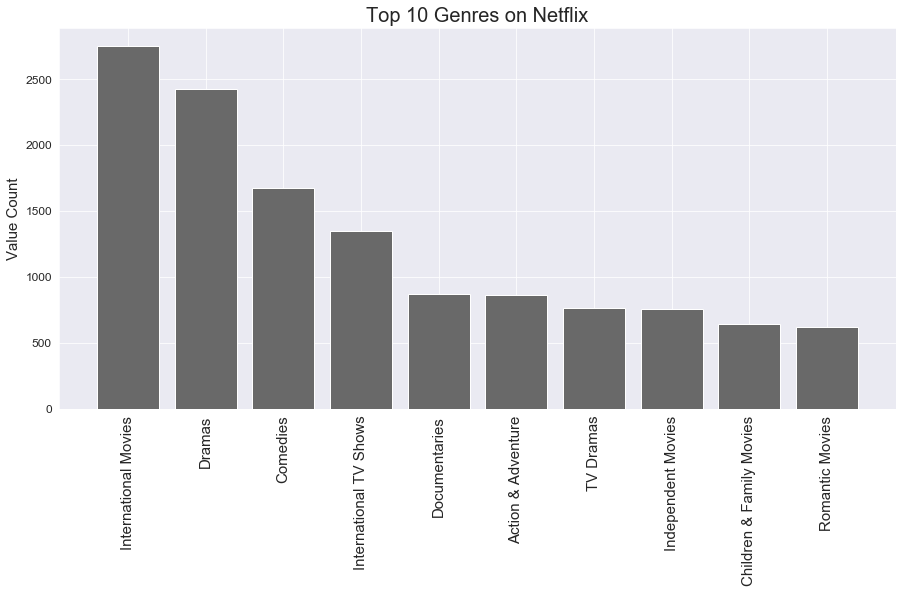

In [32]:
fig, ax = plt.subplots(figsize=(15,7))

ax4 = plt.bar(list(genre_dict.keys())[:10], list(genre_dict.values())[:10], color='dimgrey')

plt.title('Top 10 Genres on Netflix', fontsize=20)
plt.ylabel('Value Count', fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=15, rotation='90')

plt.show()

- Top 3 amount of genre in Netflix are: 'International Movies', 'Dramas', 'Comedies'

### Top 10 Producing Countries

In [33]:
country_l = []
for c in df.country:
    li = c.split(',')
    for i in li:
        country_l.append(i.strip())

In [34]:
country_d = {}
for x in country_l:
    country_d[x] = country_l.count(x)

In [35]:
country_d = sorted(country_d.items(), key=lambda x:x[1], reverse=False)

In [36]:
country_d = dict(country_d)

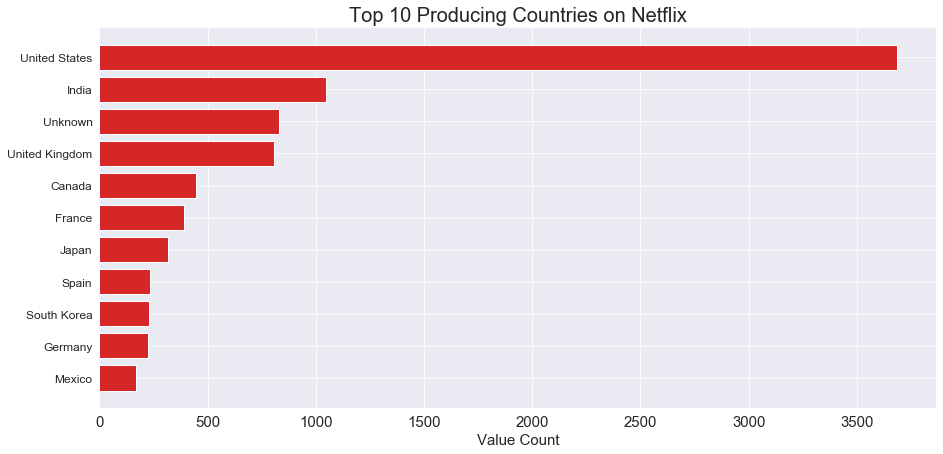

In [37]:
fig, ax = plt.subplots(figsize=(15,7))

# Showing top 11 since we have 'Unknown' country in our data set
ax5 = plt.barh(list(country_d.keys())[-11:], list(country_d.values())[-11:], color='tab:red')

plt.title('Top 10 Producing Countries on Netflix', fontsize=20)
plt.xlabel('Value Count', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)

plt.show()

### Movie/TV Show Duration distribution

In [38]:
movie_dur = df[df['type'] == 'Movie'][['type', 'duration']]

In [39]:
movie_dur.duration = movie_dur['duration'].str.replace(' min', '').astype(int)

In [40]:
# Average movie duration
movie_dur.duration.mean()

99.56499755341706

In [41]:
# Standard deviation of movie duration
movie_dur.duration.std()

28.289504416127716

In [42]:
# Top 5 movie duration
movie_dur.duration.value_counts().head()

90    152
93    146
94    146
97    146
91    144
Name: duration, dtype: int64

In [43]:
tv_dur = df[df['type'] == 'TV Show'][['type', 'duration']]

In [44]:
tv_dur.duration = tv_dur['duration'].apply(lambda x: int(x.split()[0]))

In [45]:
tv_dur.duration.value_counts()

1     1793
2      421
3      198
4       94
5       64
6       33
7       23
8       17
9        9
10       6
15       2
13       2
12       2
17       1
11       1
Name: duration, dtype: int64

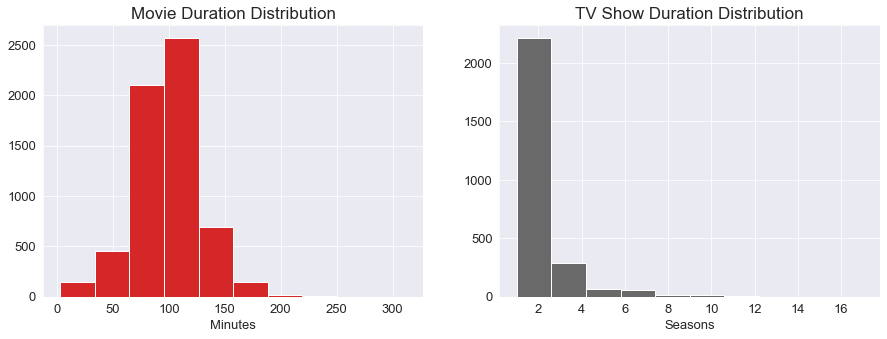

In [46]:
fig, (ax6, ax7) = plt.subplots(1, 2, figsize=(15,5))

ax6.hist(movie_dur.duration, color='tab:red')
ax6.set_title('Movie Duration Distribution', fontsize=17)
ax6.set_xlabel('Minutes', fontsize=13)
ax6.tick_params(axis='both', labelsize=13)

ax7.hist(tv_dur.duration, color='dimgrey')
ax7.set_title('TV Show Duration Distribution', fontsize=17)
ax7.set_xlabel('Seasons', fontsize=13)
ax7.tick_params(axis='both', labelsize=13)

plt.show()

### Movie/TV Show Rating

In [47]:
movie_rate = pd.DataFrame(df.groupby('type')['rating'].value_counts()['Movie'].sort_values(ascending=True))

In [48]:
tv_rate = pd.DataFrame(df.groupby('type')['rating'].value_counts()['TV Show'].sort_values(ascending=True))

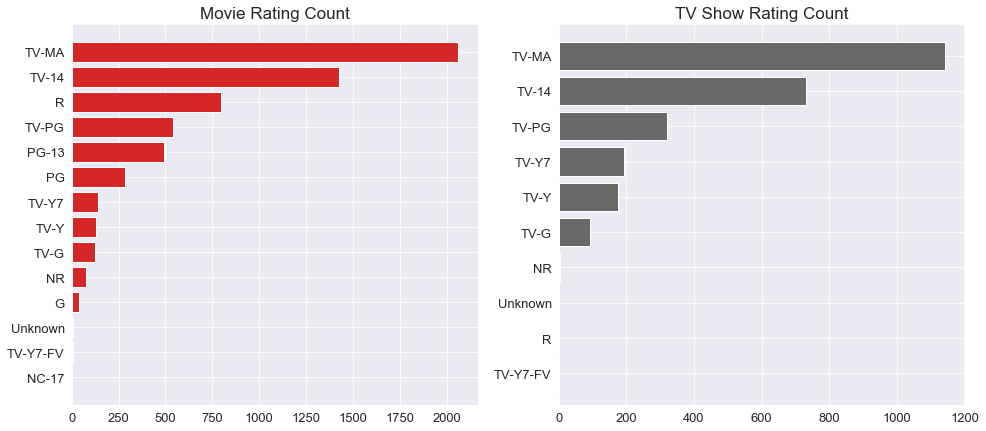

In [49]:
fig, (ax8, ax9) = plt.subplots(1, 2, figsize=(16,7))

ax8.barh(movie_rate.index, movie_rate.rating, color='tab:red')
ax8.set_title('Movie Rating Count', fontsize=17)
ax8.tick_params(axis='both', labelsize=13)

ax9.barh(tv_rate.index, tv_rate.rating, color='dimgrey')
ax9.set_title('TV Show Rating Count', fontsize=17)
ax9.tick_params(axis='both', labelsize=13)

plt.show()

- 'TV-MA' is the most common rating on Netflix.